In [34]:
import  scipy.signal.signaltools

def _centered(arr, newsize):
    # Return the center newsize portion of the array.
    newsize = np.asarray(newsize)
    currsize = np.array(arr.shape)
    startind = (currsize - newsize) // 2
    endind = startind + newsize
    myslice = [slice(startind[k], endind[k]) for k in range(len(endind))]
    return arr[tuple(myslice)]

scipy.signal.signaltools._centered = _centered

In [35]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from patsy import dmatrix
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, roc_curve, auc, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, ParameterGrid, RandomizedSearchCV
from sklearn.ensemble import BaggingRegressor,BaggingClassifier,RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import VotingRegressor, StackingRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant
import datetime 
import holidays
from statsmodels.tsa.stattools import pacf
import xgboost as xgb
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from prophet import Prophet
import statsmodels.api as sm 
from sklearn.metrics import mean_absolute_percentage_error

# suppressing warnings
import warnings
warnings.filterwarnings("ignore")

In [36]:
data_east = pd.read_csv('univar_data/east_daily.csv')
data_east

,date,daily_deaths
0,2020-02-12,0
1,2020-02-13,0
2,2020-02-14,0
3,2020-02-15,0
4,2020-02-16,0
...,...,...
1131,2023-03-19,0
1132,2023-03-20,7
1133,2023-03-21,14
1134,2023-03-22,266


In [37]:
#Creating east stationary dataset 

# Calculate the differenced series
data_east_stationary = data_east['daily_deaths'] - data_east['daily_deaths'].shift(1)

# Create a new DataFrame with the differenced series
data_east_stationary = pd.DataFrame(data_east_stationary, columns=['daily_deaths'])

# Drop the 'date' column if it exists
if 'date' in data_east_stationary.columns:
    data_east_stationary = data_east_stationary.drop(columns=['date'])

# Drop any rows with missing values (NaN) resulting from differencing
data_east_stationary = data_east_stationary.dropna()

data_east_stationary

,daily_deaths
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
...,...
1131,0.0
1132,7.0
1133,7.0
1134,252.0


In [38]:
data_midwest = pd.read_csv('univar_data/midwest_daily.csv')
data_midwest 

,date,daily_deaths
0,2020-02-12,0
1,2020-02-13,0
2,2020-02-14,0
3,2020-02-15,0
4,2020-02-16,0
...,...,...
1131,2023-03-19,0
1132,2023-03-20,23
1133,2023-03-21,131
1134,2023-03-22,40


In [39]:
data_midwest_stationary = pd.read_csv('univar_data/midwest_stationary.csv')
data_midwest_stationary 

,daily_deaths
0,0
1,0
2,0
3,0
4,0
...,...
1130,0
1131,23
1132,108
1133,-91


In [40]:
data_west = pd.read_csv('univar_data/west_daily.csv')
data_west

,date,daily_deaths
0,2020-02-12,0
1,2020-02-13,0
2,2020-02-14,0
3,2020-02-15,0
4,2020-02-16,0
...,...,...
1131,2023-03-19,0
1132,2023-03-20,37
1133,2023-03-21,33
1134,2023-03-22,184


In [41]:
data_west_stationary = pd.read_csv('univar_data/west_stationary.csv')
data_west_stationary

,daily_deaths
0,0
1,0
2,0
3,0
4,0
...,...
1130,0
1131,37
1132,-4
1133,151


In [42]:
data_south = pd.read_csv('univar_data/south_daily.csv')
data_south 

,date,daily_deaths
0,2020-02-12,0
1,2020-02-13,0
2,2020-02-14,0
3,2020-02-15,0
4,2020-02-16,0
...,...,...
1131,2023-03-19,0
1132,2023-03-20,71
1133,2023-03-21,31
1134,2023-03-22,240


In [43]:
data_south_stationary = pd.read_csv('univar_data/south_stationary.csv')
data_south_stationary 

,daily_deaths
0,0
1,0
2,0
3,0
4,0
...,...
1130,0
1131,71
1132,-40
1133,209


# Stationary Analysis

In [44]:
X = data_east.daily_deaths
result = adfuller(X)
print('East ADF Statistic: %f' % result[0])
print('East p-value: %f' % result[1])
print('East Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

X = data_midwest_stationary.daily_deaths
result = adfuller(X)
print('Midwest ADF Statistic: %f' % result[0])
print('Midwest p-value: %f' % result[1])
print('Midwest Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

X = data_south_stationary.daily_deaths
result = adfuller(X)
print('South ADF Statistic: %f' % result[0])
print('South p-value: %f' % result[1])
print('South Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

X = data_west_stationary.daily_deaths
result = adfuller(X)
print('West ADF Statistic: %f' % result[0])
print('West p-value: %f' % result[1])
print('West Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

East ADF Statistic: -3.842138
East p-value: 0.002504
East Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
Midwest ADF Statistic: -6.609058
Midwest p-value: 0.000000
Midwest Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
South ADF Statistic: -6.154608
South p-value: 0.000000
South Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
West ADF Statistic: -5.689075
West p-value: 0.000001
West Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568


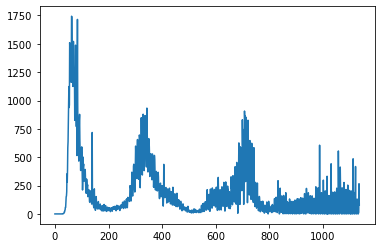

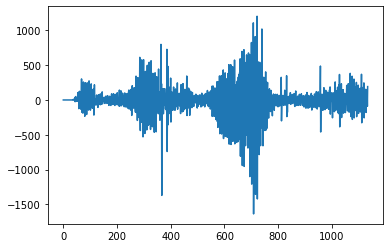

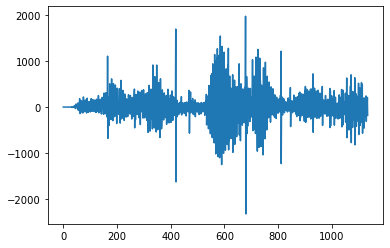

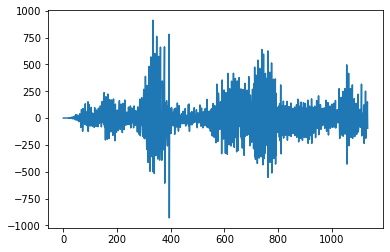

In [45]:
data_east['daily_deaths'].plot()
plt.show()

data_midwest_stationary['daily_deaths'].plot()
plt.show()

data_south_stationary['daily_deaths'].plot()
plt.show()

data_west_stationary['daily_deaths'].plot()
plt.show()

# Prophet - Univariate 

# defining MASE

In [46]:
def MASE(Actual, Predicted):
    n = len(Actual)
    
    mae = mean_absolute_error(Actual, Predicted)

    # Calculate the denominator
    denominator = 1 / (n - 1) * np.sum(np.abs(Predicted[1:] - Actual[:-1]))

    # Avoid division by zero or small denominators
    if denominator > 1e-6:
        mase = mae / denominator
    else:
        mase = np.inf

    return mase

11:14:54 - cmdstanpy - INFO - Chain [1] start processing
11:14:54 - cmdstanpy - INFO - Chain [1] done processing


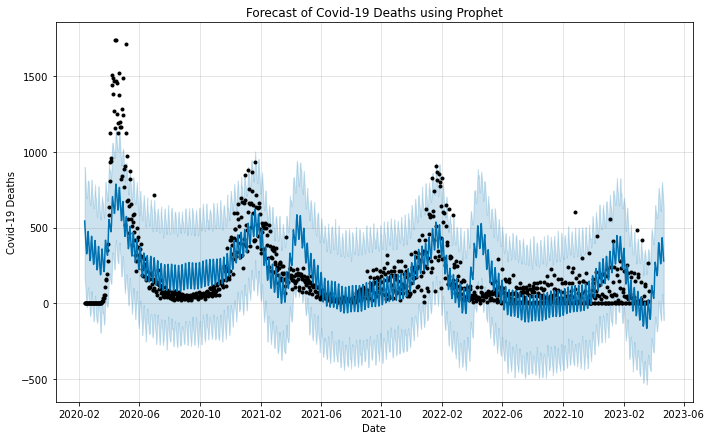

In [47]:
#using univariate data - EAST

# Assuming 'data' contains your dataset with a DateTime index and a column named 'covid_19_deaths'
# If not, replace 'covid_19_deaths' with the actual column name of your time series variable
data_prophet = data_east.reset_index()  # Reset index to use 'ds' as the time column
data_prophet = data_prophet.rename(columns={'date': 'ds', 'daily_deaths': 'y'})  # Rename columns for Prophet

# Initialize Prophet model with custom parameters
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    changepoint_prior_scale=0.05,
    holidays=None,  # You can specify holidays here
    seasonality_mode='additive',
    interval_width=0.95
)

# Fit the model to the data
model.fit(data_prophet)

# Define future dates for prediction
future_dates = model.make_future_dataframe(periods=30)  # Forecast for 30 days into the future

# Make predictions
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Covid-19 Deaths')
plt.title('Forecast of Covid-19 Deaths using Prophet')
plt.show()

In [48]:
#Printing Model Summary 

# Convert 'ds' column in actual data to datetime
data_prophet['ds'] = pd.to_datetime(data_prophet['ds'])

# Convert 'ds' column in forecast to datetime
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Concatenate actual data and forecasted values based on 'ds' column
merged_data = pd.concat([data_prophet.set_index('ds'), forecast.set_index('ds')], axis=1, join='inner').reset_index()

# Calculate performance metrics
mse = mean_squared_error(merged_data['y'], merged_data['yhat'])
mae = mean_absolute_error(merged_data['y'], merged_data['yhat'])
rmse = np.sqrt(mse)

# Print the performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 35364.434465324266
Mean Absolute Error (MAE): 131.57457003554308
Root Mean Squared Error (RMSE): 188.05433912921092


11:14:55 - cmdstanpy - INFO - Chain [1] start processing
11:14:55 - cmdstanpy - INFO - Chain [1] done processing


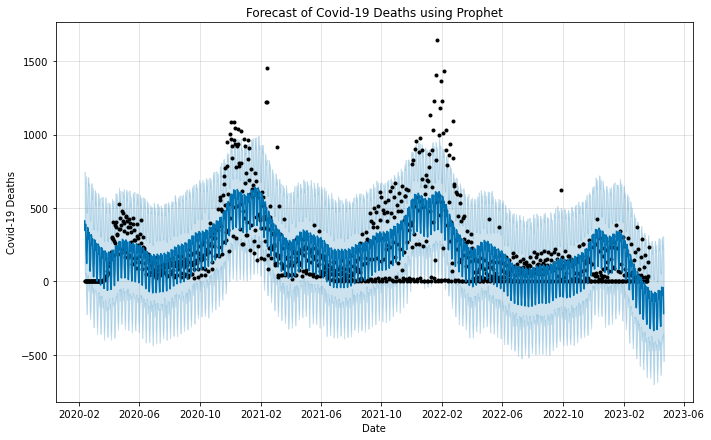

In [49]:
#using univariate data - MIDWEST


# Assuming 'data' contains your dataset with a DateTime index and a column named 'covid_19_deaths'
# If not, replace 'covid_19_deaths' with the actual column name of your time series variable
data_prophet = data_midwest.reset_index()  # Reset index to use 'ds' as the time column
data_prophet = data_prophet.rename(columns={'date': 'ds', 'daily_deaths': 'y'})  # Rename columns for Prophet

# Initialize Prophet model with custom parameters
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    changepoint_prior_scale=0.05,
    holidays=None,  # You can specify holidays here
    seasonality_mode='additive',
    interval_width=0.95
)

# Fit the model to the data
model.fit(data_prophet)

# Define future dates for prediction
future_dates = model.make_future_dataframe(periods=30)  # Forecast for 30 days into the future

# Make predictions
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Covid-19 Deaths')
plt.title('Forecast of Covid-19 Deaths using Prophet')
plt.show()

In [50]:
#Printing Model Summary 

# Convert 'ds' column in actual data to datetime
data_prophet['ds'] = pd.to_datetime(data_prophet['ds'])

# Convert 'ds' column in forecast to datetime
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Concatenate actual data and forecasted values based on 'ds' column
merged_data = pd.concat([data_prophet.set_index('ds'), forecast.set_index('ds')], axis=1, join='inner').reset_index()

# Calculate performance metrics
mse = mean_squared_error(merged_data['y'], merged_data['yhat'])
mae = mean_absolute_error(merged_data['y'], merged_data['yhat'])
rmse = np.sqrt(mse)

# Print the performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 29912.64412153853
Mean Absolute Error (MAE): 124.54443439896573
Root Mean Squared Error (RMSE): 172.95272221488312


11:14:56 - cmdstanpy - INFO - Chain [1] start processing
11:14:56 - cmdstanpy - INFO - Chain [1] done processing


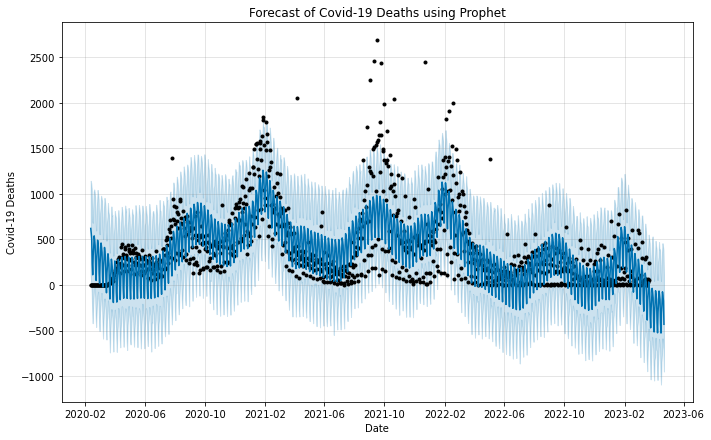

In [51]:
#using univariate data - SOUTH


# Assuming 'data' contains your dataset with a DateTime index and a column named 'covid_19_deaths'
# If not, replace 'covid_19_deaths' with the actual column name of your time series variable
data_prophet = data_south.reset_index()  # Reset index to use 'ds' as the time column
data_prophet = data_prophet.rename(columns={'date': 'ds', 'daily_deaths': 'y'})  # Rename columns for Prophet

# Initialize Prophet model with custom parameters
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    changepoint_prior_scale=0.05,
    holidays=None,  # You can specify holidays here
    seasonality_mode='additive',
    interval_width=0.95
)

# Fit the model to the data
model.fit(data_prophet)

# Define future dates for prediction
future_dates = model.make_future_dataframe(periods=30)  # Forecast for 30 days into the future

# Make predictions
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Covid-19 Deaths')
plt.title('Forecast of Covid-19 Deaths using Prophet')
plt.show()

In [52]:
#Printing Model Summary 

# Convert 'ds' column in actual data to datetime
data_prophet['ds'] = pd.to_datetime(data_prophet['ds'])

# Convert 'ds' column in forecast to datetime
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Concatenate actual data and forecasted values based on 'ds' column
merged_data = pd.concat([data_prophet.set_index('ds'), forecast.set_index('ds')], axis=1, join='inner').reset_index()


# Calculate performance metrics
mse = mean_squared_error(merged_data['y'], merged_data['yhat'])
mae = mean_absolute_error(merged_data['y'], merged_data['yhat'])
rmse = np.sqrt(mse)

# Print the performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 77218.75537674491
Mean Absolute Error (MAE): 205.23103325844582
Root Mean Squared Error (RMSE): 277.8826287783116


11:14:57 - cmdstanpy - INFO - Chain [1] start processing
11:14:57 - cmdstanpy - INFO - Chain [1] done processing


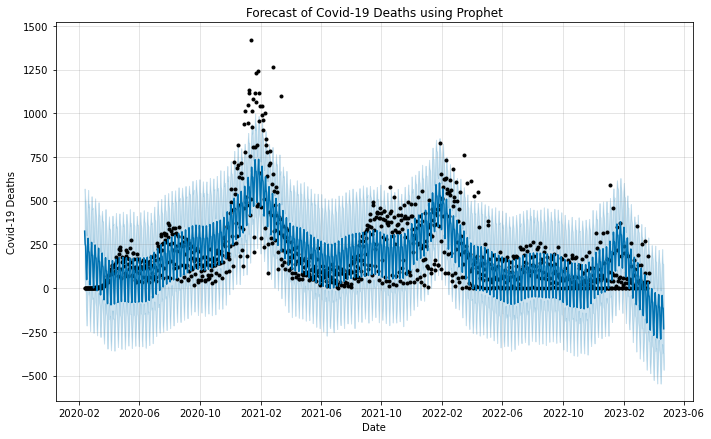

In [53]:
#using univariate data - WEST

# Assuming 'data' contains your dataset with a DateTime index and a column named 'covid_19_deaths'
# If not, replace 'covid_19_deaths' with the actual column name of your time series variable
data_prophet = data_west.reset_index()  # Reset index to use 'ds' as the time column
data_prophet = data_prophet.rename(columns={'date': 'ds', 'daily_deaths': 'y'})  # Rename columns for Prophet

# Initialize Prophet model with custom parameters
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True,
    changepoint_prior_scale=0.05,
    holidays=None,  # You can specify holidays here
    seasonality_mode='additive',
    interval_width=0.95
)

# Fit the model to the data
model.fit(data_prophet)

# Define future dates for prediction
future_dates = model.make_future_dataframe(periods=30)  # Forecast for 30 days into the future

# Make predictions
forecast = model.predict(future_dates)

# Plot the forecast
fig = model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Covid-19 Deaths')
plt.title('Forecast of Covid-19 Deaths using Prophet')
plt.show()

In [54]:
#Printing Model Summary 

# Convert 'ds' column in actual data to datetime
data_prophet['ds'] = pd.to_datetime(data_prophet['ds'])

# Convert 'ds' column in forecast to datetime
forecast['ds'] = pd.to_datetime(forecast['ds'])

# Concatenate actual data and forecasted values based on 'ds' column
merged_data = pd.concat([data_prophet.set_index('ds'), forecast.set_index('ds')], axis=1, join='inner').reset_index()


# Calculate performance metrics
mse = mean_squared_error(merged_data['y'], merged_data['yhat'])
mae = mean_absolute_error(merged_data['y'], merged_data['yhat'])
rmse = np.sqrt(mse)

# Print the performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 17406.57063020032
Mean Absolute Error (MAE): 96.81048309627664
Root Mean Squared Error (RMSE): 131.93396314141526


<AxesSubplot:>

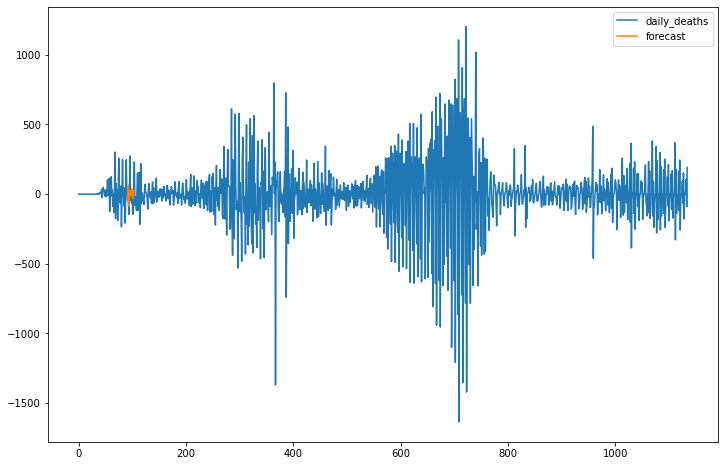

In [55]:
#midwest

model=sm.tsa.statespace.SARIMAX(data_midwest_stationary['daily_deaths'],order=(2, 0, 3),seasonal_order=(1,1,1,12))
results=model.fit()

data_midwest_stationary['forecast']=results.predict(start=90,end=103,dynamic=True)
data_midwest_stationary[['daily_deaths','forecast']].plot(figsize=(12,8))

In [56]:
# Import necessary libraries

# Define the forecasted period
start_idx = 90
end_idx = 103

# Slice the actual data to match the forecasted period
actual_data = data_midwest_stationary['daily_deaths'].iloc[start_idx:end_idx]

# Slice the forecasted values to match the forecasted period
forecast_values = data_midwest['daily_deaths'].iloc[start_idx:end_idx]

# Calculate performance metrics
mse = mean_squared_error(actual_data, forecast_values)
mae = mean_absolute_error(actual_data, forecast_values)
rmse = np.sqrt(mse)

# Print the performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 137712.15384615384
Mean Absolute Error (MAE): 347.2307692307692
Root Mean Squared Error (RMSE): 371.09588228132344


<AxesSubplot:>

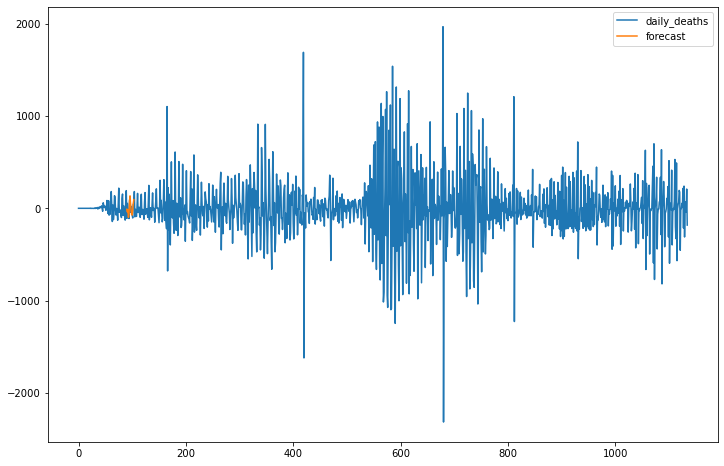

In [57]:
#south

model=sm.tsa.statespace.SARIMAX(data_south_stationary['daily_deaths'],order=(5, 0, 2),seasonal_order=(1,1,1,12))
results=model.fit()

data_south_stationary['forecast']=results.predict(start=90,end=103,dynamic=True)
data_south_stationary[['daily_deaths','forecast']].plot(figsize=(12,8))

In [58]:
# Import necessary libraries


# Define the forecasted period
start_idx = 90
end_idx = 103

# Slice the actual data to match the forecasted period
actual_data = data_south_stationary['daily_deaths'].iloc[start_idx:end_idx]

# Slice the forecasted values to match the forecasted period
forecast_values = data_south['daily_deaths'].iloc[start_idx:end_idx]

# Calculate performance metrics
mse = mean_squared_error(actual_data, forecast_values)
mae = mean_absolute_error(actual_data, forecast_values)
rmse = np.sqrt(mse)

# Print the performance metrics
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Squared Error (MSE): 103274.15384615384
Mean Absolute Error (MAE): 291.38461538461536
Root Mean Squared Error (RMSE): 321.36296277908855
